<a href="https://colab.research.google.com/github/cole-beach/Simple-Neural-Network/blob/main/Neural_Network_Kaggle_Predicting_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Kaggle

## Required Task:

1) Be sure to perform a train test split on the train.csv so you can evaluate your models

2) Create and evaluate 3 iterations of a deep learning model to predict **housing prices** using the techniques you have learned to optimize your model's performance.  Be sure to include some form of regularization with at least one model

3) Select your best model!

**OPTIONAL** : (but fun!)

Use your best model to make predictions using the features in test.csv
Submit to the Kaggle competition to see how your did!
Include a screenshot of your results from the Kaggle competition inserted in a markdown cell at the bottom of your notebook. 

# Exploring Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
 
#Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
 
# Sci-kit learn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

## Loading Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo: Data Science/03 Data Science: Advanced Machine Learning/Notes & Assignments/Week 3/Data/HousePrices_Train.csv')
pd.set_option('max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print(f'data info: {df.info()}')
print(f'\nduplicate rows: {df.duplicated().sum()}')
na_rows = df.isna().any().sum()
print(f'{na_rows} rows are missing data')
print(f'{na_rows/len(df)*100:.1f}% of rows are missing data')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

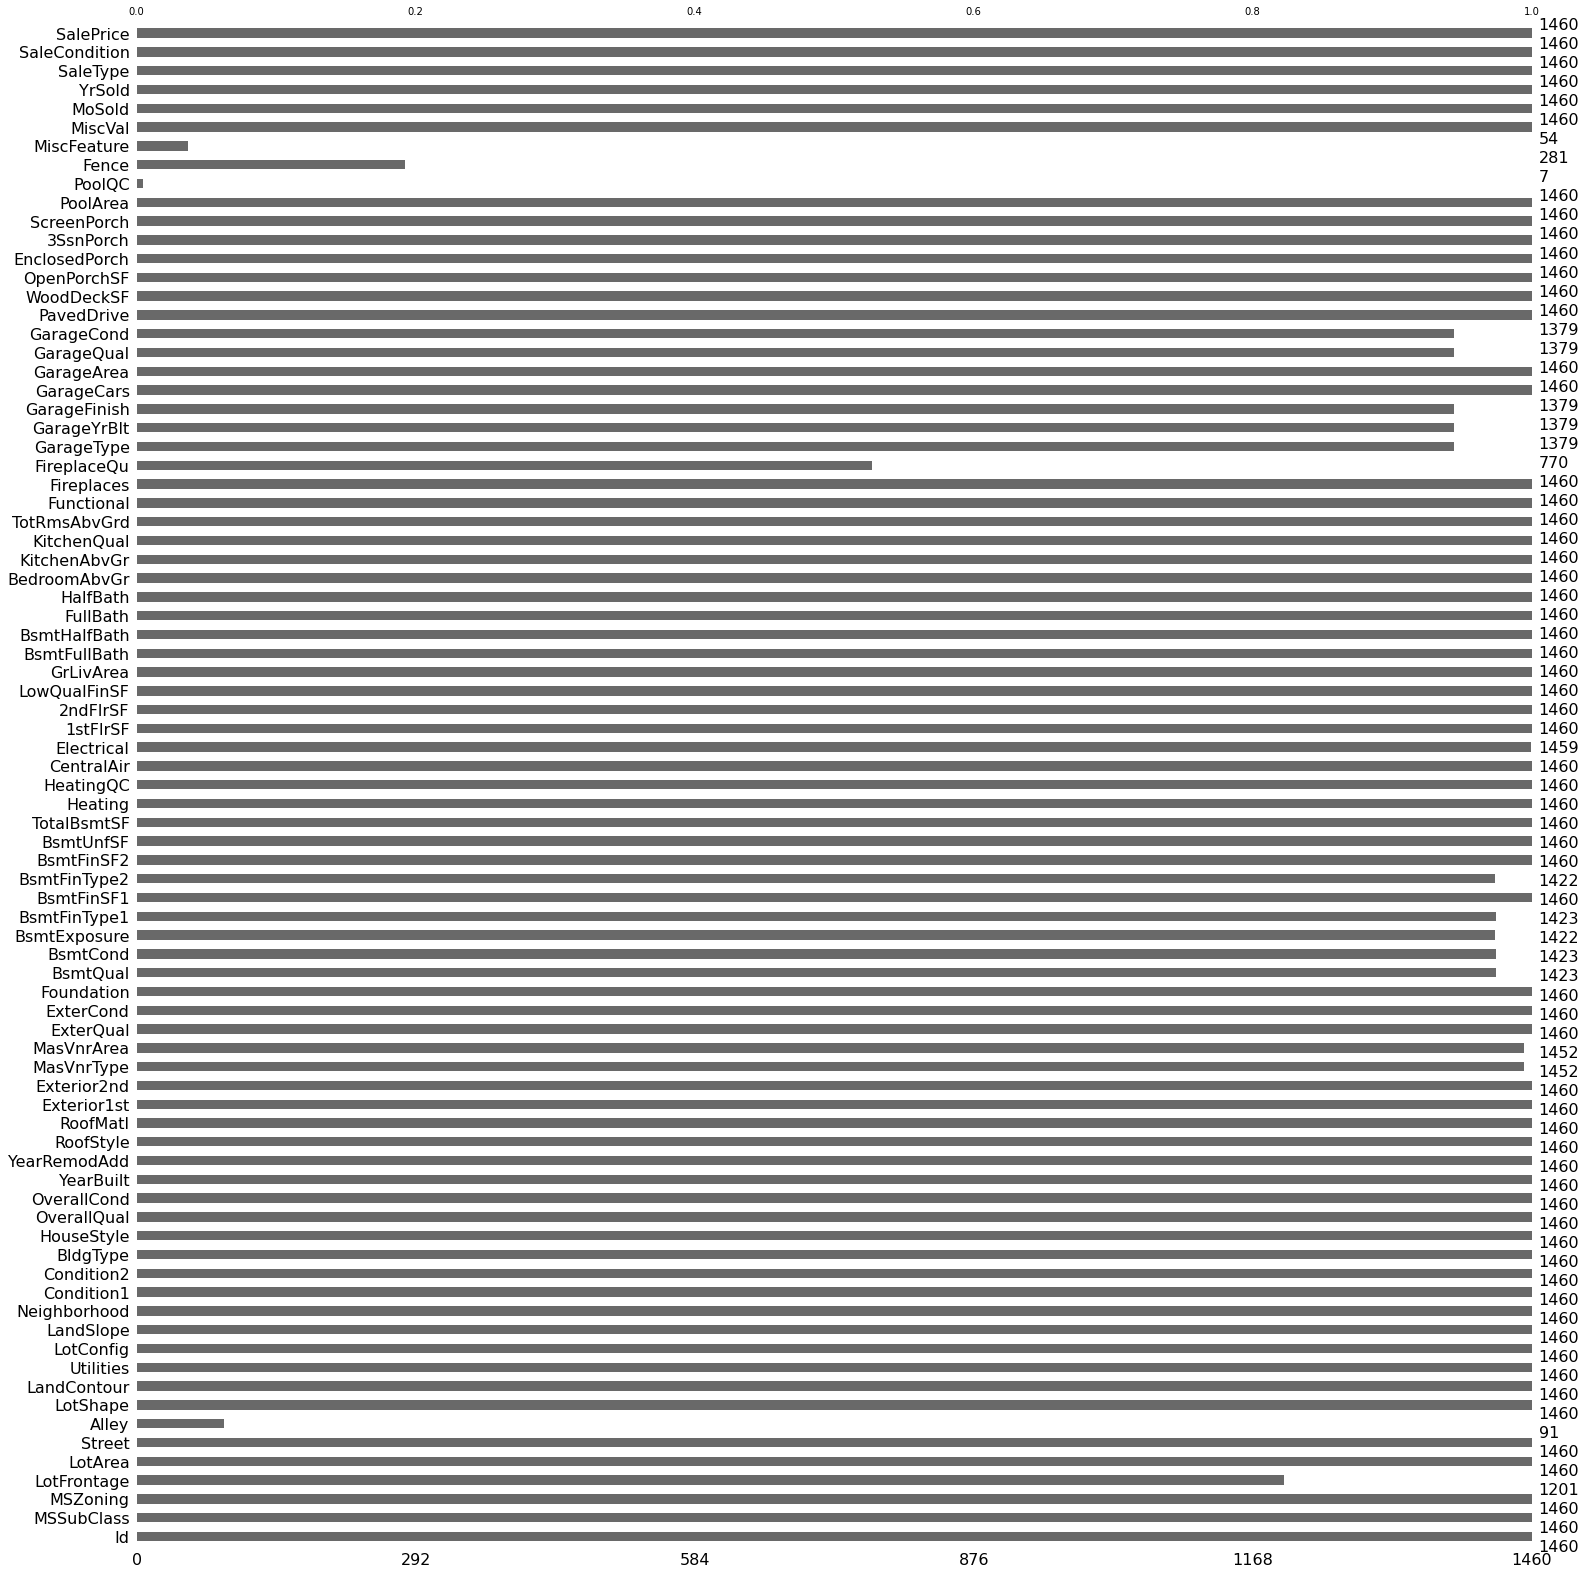

In [ ]:

msno.bar(df);

Since the amount of missing data is only 1% of the data, we can go ahead and drop those rows. 

In [ ]:
# drop missing data
df.dropna(axis=1, inplace=True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


### custom function to plot our model's learning history

In [ ]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

# Preprocessing

In [ ]:
X = df.drop(columns='SalePrice')
y = df['SalePrice']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
 
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
 
# column transformer
preprocessor = make_column_transformer((ohe, cat_selector), (scaler, num_selector))
 
# process the data
preprocessor.fit(X_train, y_train)
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)
 
X_train_proc.shape

(1095, 213)

# Building and Training Models

## Neural Networks

In [ ]:
# create model architecture
input_shape = X_train_proc.shape[1]
 
reg_model = Sequential()

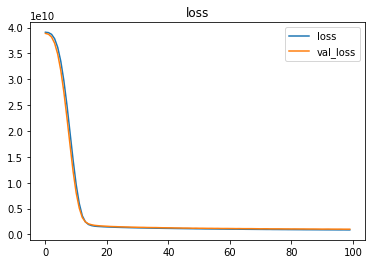

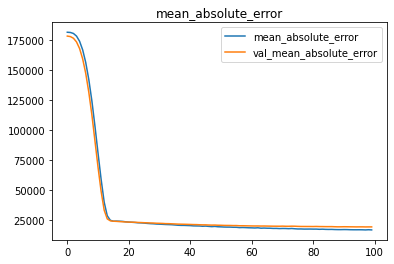

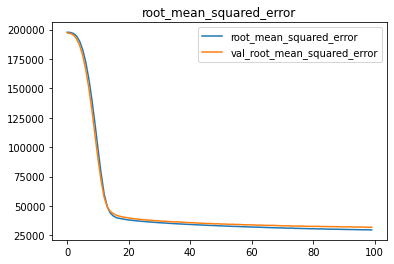

In [ ]:
reg_model.add(Dense(213, input_dim = input_shape, activation='relu'))
reg_model.add(Dense(100, activation='relu'))
reg_model.add(Dense(1, activation='linear'))
 
reg_model.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

# Fit the model
history = reg_model.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=100,
                        verbose=0)

# Plotting History
plot_history(history)

In [ ]:
# evaluate model
y_pred = reg_model.predict(X_test_proc)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

final RMSE: 31876.49479426478
final MAE: 19370.357288099316
final R2: 0.8549513072475404


The final R2 score is 85%, but there's a large amount of bias happening. I'm going to add an additional hidden-layer to see if this will adjust anything. 

### Added Hidden-Layer

In [ ]:
input_shape = X_train_proc.shape[1]
 
added_layer = Sequential()

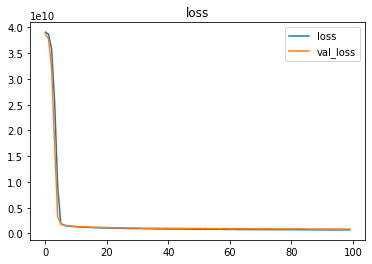

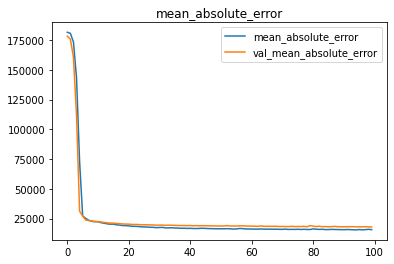

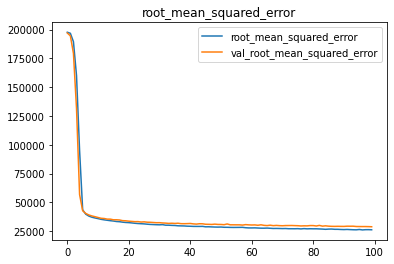

In [ ]:
added_layer.add(Dense(213, input_dim = input_shape, activation='relu'))
added_layer.add(Dense(100, activation='relu'))
added_layer.add(Dense(75, activation='relu'))
added_layer.add(Dense(1, activation='linear'))

# Compile
added_layer.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

# Fit the model
added_layer_history = added_layer.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=100,
                        verbose=0)

# Plotting History
plot_history(added_layer_history)

In [ ]:
# evaluate model
added_layer_pred = added_layer.predict(X_test_proc)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, added_layer_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, added_layer_pred)}')
print(f'final R2: {r2_score(y_test, added_layer_pred)}')

final RMSE: 28891.87437695307
final MAE: 17985.805094178082
final R2: 0.8808417446286845


By simply adding an additional hidden layer the final R2 score increased to 88%.

I'm going to add another hidden layer to see if that will continue to increase the score. 

### Second Hidden-Layer Added

In [ ]:
input_shape = X_train_proc.shape[1]
 
second_added_layer = Sequential()

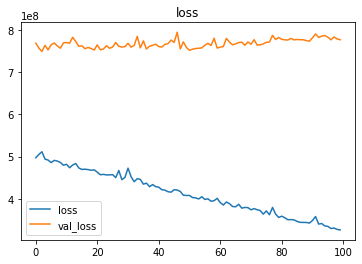

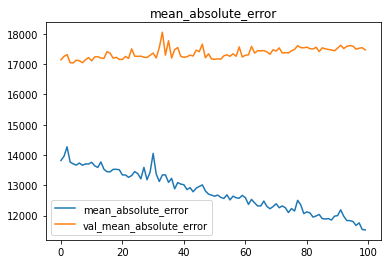

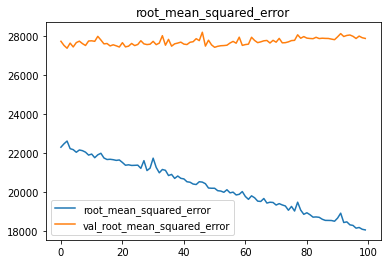

In [ ]:
second_added_layer.add(Dense(213, input_dim = input_shape, activation='relu'))
second_added_layer.add(Dense(100, activation='relu'))
second_added_layer.add(Dense(75, activation='relu'))
second_added_layer.add(Dense(50, activation='relu'))
second_added_layer.add(Dense(1, activation='linear'))

# Compile
second_added_layer.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

# Fit the model
second_added_layer_history = added_layer.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=100,
                        verbose=0)

# Plotting History
plot_history(second_added_layer_history)

In [ ]:
# evaluate model
second_added_layer_pred = second_added_layer.predict(X_test_proc)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, second_added_layer_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, second_added_layer_pred)}')
print(f'final R2: {r2_score(y_test, second_added_layer_pred)}')

final RMSE: 197192.0435219864
final MAE: 178547.98745496175
final R2: -4.550747545590726


Adding one more hidden layer did not help in anyway. Let's see what adding a dropout will do. 

### Adjusted Neurons

In [131]:
input_shape = X_train_proc.shape[1]
 
added_layer1 = Sequential()

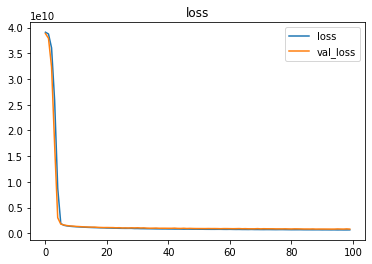

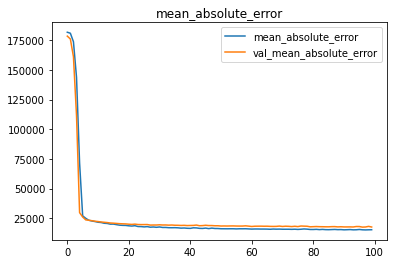

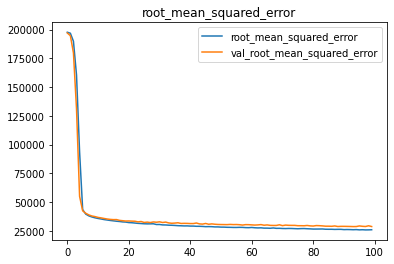

In [132]:
added_layer1.add(Dense(250, input_dim = input_shape, activation='relu'))
added_layer1.add(Dense(100, activation='relu'))
added_layer1.add(Dense(75, activation='relu'))
added_layer1.add(Dense(1, activation='linear'))

# Compile
added_layer1.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

# Fit the model
added_layer_history1 = added_layer1.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=100,
                        verbose=0)

# Plotting History
plot_history(added_layer_history1)

In [133]:
# evaluate model
added_layer_pred1 = added_layer1.predict(X_test_proc)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, added_layer_pred1))}')
print(f'final MAE: {mean_absolute_error(y_test, added_layer_pred1)}')
print(f'final R2: {r2_score(y_test, added_layer_pred1)}')

final RMSE: 28782.15671127362
final MAE: 17678.99033604452
final R2: 0.8817450395460174


By increasing the input neuron from 213 to 250 we can incrased our R2 score to 88.17%, so there is a slight increase. 

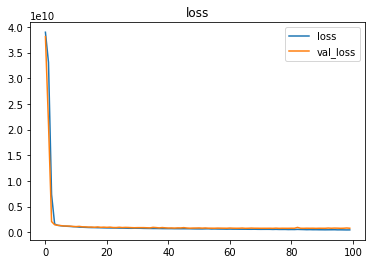

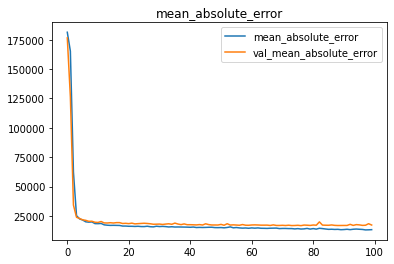

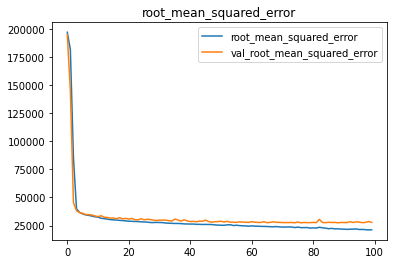

In [148]:
input_shape = X_train_proc.shape[1]
 
added_layer2 = Sequential()

added_layer2.add(Dense(300, input_dim = input_shape, activation='relu'))
added_layer2.add(Dense(250, activation='relu'))
added_layer2.add(Dense(550, activation='relu'))
added_layer2.add(Dense(1, activation='linear'))

# Compile
added_layer2.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

# Fit the model
added_layer_history2 = added_layer2.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=100,
                        verbose=0)

# Plotting History
plot_history(added_layer_history2)

In [150]:
# evaluate model
added_layer_pred2 = added_layer2.predict(X_test_proc)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, added_layer_pred2))}')
print(f'final MAE: {mean_absolute_error(y_test, added_layer_pred2)}')
print(f'final R2: {r2_score(y_test, added_layer_pred2)}')

final RMSE: 27742.69540772152
final MAE: 17330.289608304796
final R2: 0.8901323064071531


# Dropout

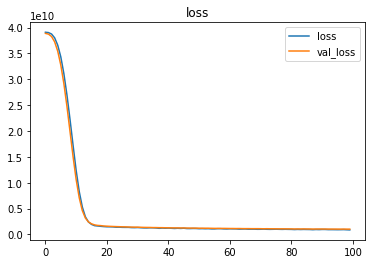

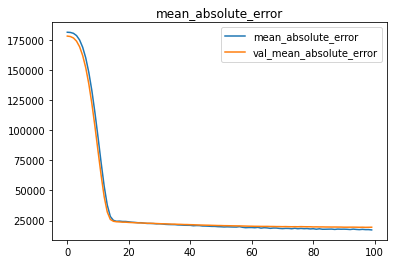

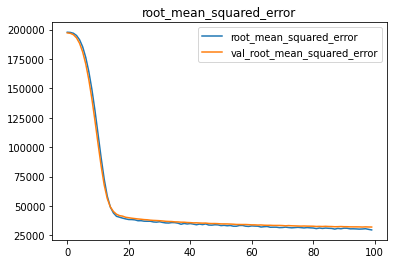

In [ ]:
# create model architecture
input_shape = X_train_proc.shape[1]
 
drop_model = Sequential()
 
drop_model.add(Dense(213, input_dim = input_shape, activation='relu'))
drop_model.add(Dropout(.1))

drop_model.add(Dense(100, activation='relu'))

added_layer.add(Dense(75, activation='relu'))

drop_model.add(Dense(1, activation='linear'))
 
# Compile
drop_model.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

# History
drop_history = drop_model.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=100,
                        verbose=0)

# Plotting history
plot_history(drop_history)

In [ ]:
# evaluate model
y_pred = drop_model.predict(X_test_proc)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

final RMSE: 32123.218864299775
final MAE: 19415.6201947774
final R2: 0.8526972639616639


It looks like adding a dropout reduces our final R2 score, which is not good at all. 

# Early Stopping

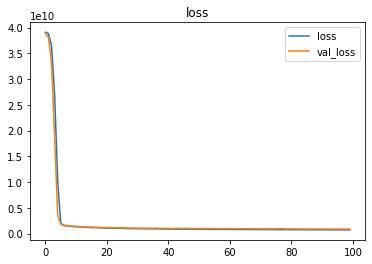

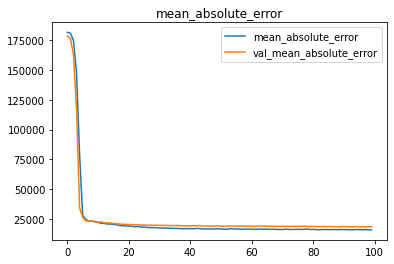

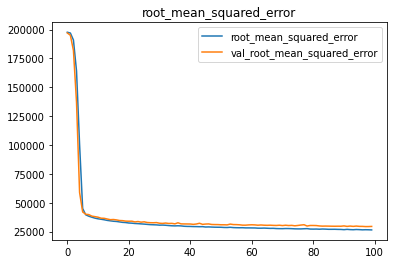

In [128]:
# create model architecture
input_shape1 = X_train_proc.shape[1]
 
early_model = Sequential()
 
early_model.add(Dense(213, input_dim = input_shape1, activation='relu'))

early_model.add(Dense(100, activation='relu'))
early_model.add(Dense(75, activation='relu'))

early_model.add(Dense(1, activation='linear'))

# Compile
early_model.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])
early_stopping = EarlyStopping(patience = 30)

# History
early_history = early_model.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=100,
                        verbose=0)

# Plotting history
plot_history(early_history)

In [ ]:
# evaluate model
y_pred = early_model.predict(X_test_proc)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

final RMSE: 28887.32018111241
final MAE: 17616.181100171234
final R2: 0.8808793072494864


# Best Model

By simply adding a hidden layer the final R2 score and adjusting the neurons used got me to a score of 89%.  